In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

In [3]:
df = pd.read_csv('../data/imu_timestamp_investigation/Timestamp_Investigation_Sheet_1.csv')

In [28]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timeline (ms)                 61 non-null     int64  
 1   Gyroscope Timestamp (ms)      61 non-null     float64
 2   Accelerometer Timestamp (ms)  61 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


In [41]:
df.head(5)

,Timeline (ms),Gyroscope Timestamp (ms),Accelerometer Timestamp (ms)
0,1872,1872.114,1872.623
1,1873,0.000,0.000
2,1874,0.000,0.000
3,1875,0.000,0.000
4,1876,0.000,1876.120


In [3]:
df = df.fillna(0)

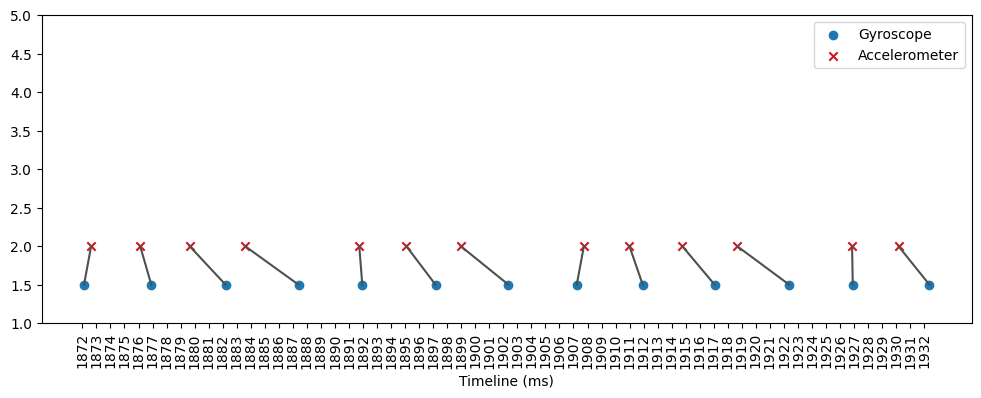

In [55]:
# importing package
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

filtered = df[df['Gyroscope Timestamp (ms)'] != 0]
filtered2 = df[df['Accelerometer Timestamp (ms)'] != 0]

# Plot lines
line_1 = plt.scatter(filtered['Gyroscope Timestamp (ms)'], np.full(filtered.shape[0], 1.5), marker='o', label='Gyroscope')
line_2 = plt.scatter(filtered2['Accelerometer Timestamp (ms)'], np.full(filtered.shape[0], 2), marker='x', color='#cf1723', label='Accelerometer')

# TO REMOVE LINES CONNECTING POINTS, SIMPLY COMMENT THE 4 FOLLOWING LINES OF CODE.
for gyro_x, acc_x in zip(filtered['Gyroscope Timestamp (ms)'].values, filtered2['Accelerometer Timestamp (ms)'].values):
    x = [gyro_x, acc_x]
    y = [1.5, 2.0]
    plt.plot(x, y, linestyle="-", color="#4d524e")

plt.legend(handles=[line_1, line_2])

plt.xlabel("Timeline (ms)")

#Set axis limits.
plt.xticks(np.arange(min(df['Timeline (ms)']), max(df['Timeline (ms)'])+1, 1.0), rotation=90)
plt.ylim(1,5)
plt.show()